In [ ]:
Final Project :Speech Emotion Recognition 

In [47]:
import os
import pandas as pd
import numpy as np
import scipy.signal as signal
import soundfile
import glob
import joblib
import librosa.display
import matplotlib.pyplot as plt
import keras
from keras.layers import Dense, BatchNormalization, Conv1D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.models import Sequential
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix


In [2]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}
#DataFlair - Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust']

In [3]:
def extraction_features(filename, mfcc, chroma, mel):
    with soundfile.SoundFile(filename) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
    if mel:
                mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
                result=np.hstack((result, mel))
    return result

In [45]:
def data_load():
    x,y=[],[]
    for files in glob.glob("C:/Users/DELL/Documents/Project/audio_speech_actors_01-24/Actor_*/*.wav"):
      try:
        filename=os.path.basename(files)
        emotion=emotions[filename.split("-")[2]]
        feature = extraction_feature(files, mfcc=True, chroma=True, mel=True)
        x.append(feature)
        y.append(emotion)
      
      
      except:
        continue

    return np.array(x),y

In [5]:
X = joblib.load("C:/Users/DELL/Documents/Project/X.joblib")
y = joblib.load("C:/Users/DELL/Documents/Project/y.joblib")


Epoch 1/100


C:\Users\DELL\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


15/15 [==============================] - 2s 44ms/step - loss: 2.3177 - accuracy: 0.1517 - val_loss: 2.1236 - val_accuracy: 0.1586
Epoch 2/100
15/15 [==============================] - 0s 9ms/step - loss: 2.0689 - accuracy: 0.2569 - val_loss: 2.0299 - val_accuracy: 0.1586
Epoch 3/100
15/15 [==============================] - 0s 11ms/step - loss: 1.9943 - accuracy: 0.2517 - val_loss: 1.9868 - val_accuracy: 0.2138
Epoch 4/100
15/15 [==============================] - 0s 10ms/step - loss: 1.9360 - accuracy: 0.2810 - val_loss: 1.9454 - val_accuracy: 0.2207
Epoch 5/100
15/15 [==============================] - 0s 11ms/step - loss: 1.8952 - accuracy: 0.2707 - val_loss: 1.7991 - val_accuracy: 0.3034
Epoch 6/100
15/15 [==============================] - 0s 10ms/step - loss: 1.7816 - accuracy: 0.3224 - val_loss: 1.6914 - val_accuracy: 0.2966
Epoch 7/100
15/15 [==============================] - 0s 11ms/step - loss: 1.6837 - accuracy: 0.3517 - val_loss: 1.6778 - val_accuracy: 0.3586
Epoch 8/100
15/15 [

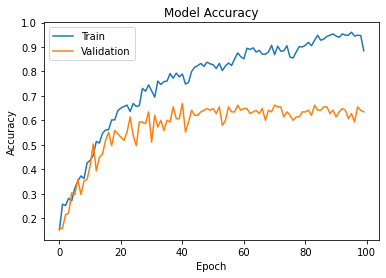

10/10 [==============================] - 0s 4ms/step - loss: 2.0126 - accuracy: 0.5288
Loss:  2.0125672817230225
Accuracy:  0.5288461446762085


In [9]:
def neuralnetwork_model(X,y):

    y = np.array(pd.get_dummies(y))

    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30,random_state=42)
    x_val_train,x_val_test,y_val_train,y_val_test = train_test_split(x_train,y_train,test_size = 0.20)

    model=Sequential()
  ### layer 1
    model.add(Dense(200,input_shape=(180,)))
    model.add(Activation('tanh'))
 
  ### layer 2
    model.add(Dense(400))
    model.add(Activation('tanh'))
 
  ### layer 3
    model.add(Dense(200))
    model.add(Activation('tanh'))
 
  ### Final layer
    model.add(Dense(8))
    model.add(Activation('softmax'))

    model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.Adam(lr=0.001), metrics = ['accuracy'])
    history = model.fit(x_val_train, y_val_train, batch_size = 40, epochs = 100, validation_data=(x_val_test, y_val_test))


  # Accuracy plotting
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='best')
    plt.savefig('Model Accuracy.png')
    plt.show()


    score = model.evaluate(x_test, y_test)
    
    print('Loss: ', score[0])
    print('Accuracy: ', score[1])

neuralnetwork_model(X,y)


In [7]:
def MultiLayerPerceptron(X,y):

    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30)

    model=MLPClassifier(batch_size=250, hidden_layer_sizes=(200,), activation='tanh',solver="adam",learning_rate='adaptive', max_iter=850,alpha=0.01)
    model.fit(x_train,y_train)

    y_prediction=model.predict(x_test)
    accuracy=accuracy_score(y_true=y_test, y_pred=y_prediction)
    print("Classification Report Using MLP CLassifier:\n",classification_report(y_test,y_prediction))
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_prediction))
    print("\nTesting Accuracy for MLP Classifier: {:.2f}%".format(accuracy*100))


MultiLayerPerceptron(X,y)

Classification Report Using MLP CLassifier:
               precision    recall  f1-score   support

       angry       0.89      0.76      0.82        55
        calm       0.79      0.82      0.80        45
     disgust       0.68      0.90      0.78        21
     fearful       0.69      0.71      0.70        41
       happy       0.83      0.76      0.80        51
     neutral       0.53      0.70      0.60        27
         sad       0.64      0.51      0.57        45
   surprised       0.66      0.70      0.68        27

    accuracy                           0.73       312
   macro avg       0.71      0.74      0.72       312
weighted avg       0.74      0.73      0.73       312

Confusion Matrix:
 [[42  1  2  3  2  4  0  1]
 [ 0 37  0  0  2  5  1  0]
 [ 1  1 19  0  0  0  0  0]
 [ 1  0  1 29  1  0  8  1]
 [ 3  4  1  1 39  1  1  1]
 [ 0  2  0  0  1 19  2  3]
 [ 0  1  3  7  1  6 23  4]
 [ 0  1  2  2  1  1  1 19]]

Testing Accuracy for MLP Classifier: 72.76%


In [46]:
def extracting_MFCC(filename):

    y, sr = librosa.load(filename)
    value = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    
    return value

In [11]:
##### load radvess speech data #####
rs_labels = [] 
rs_data = [] 
for dirname, _, filenames in os.walk('C:/Users/DELL/Documents/Project/audio_speech_actors_01-24/'):
    for file in filenames:
        rs_labels.append(int(file[7:8]) - 1) 
        filename = os.path.join(dirname, file)
        rs_data.append(extracting_MFCC(filename))

In [12]:
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
#from keras.optimizer_v1 import rmsprop

#### convert data and label to array
rs_data_array = np.asarray(rs_data) # convert the input to an array
rs_label_array = np.array(rs_labels)
rs_label_array.shape # get tuple of array dimensions

#### make categorical labels
labels_category = to_categorical(rs_label_array) # converts a class vector (integers) to binary class matrix
labels_category.shape

(1440, 8)

In [13]:
x_train,x_test,y_train,y_test= train_test_split(np.array(rs_data_array),labels_category, test_size=0.20, random_state=9)

In [14]:
# Split the training, validating, and testing sets
n_samples = rs_data_array.shape[0]
train_samples = int(n_samples * 0.8)
val_samples = int(n_samples * 0.1)
test_samples = int(n_samples * 0.1)

In [15]:
# Define the LSTM model
def model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    
    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [16]:
w = np.expand_dims(rs_data_array[:train_samples],-1)

In [21]:
w.shape

(1152, 40, 1)

In [20]:
### train using LSTM model
lstm = model_LSTM()
report = lstm.fit(np.expand_dims(rs_data_array[:train_samples],-1), labels_category[:train_samples], validation_data=(np.expand_dims(rs_data_array[train_samples:train_samples+val_samples],-1), labels_category[train_samples:train_samples+val_samples]), epochs = 100, shuffle=True)                

Epoch 1/100
36/36 [==============================] - 4s 48ms/step - loss: 2.0729 - accuracy: 0.1389 - val_loss: 2.0861 - val_accuracy: 0.1250
Epoch 2/100
36/36 [==============================] - 1s 25ms/step - loss: 2.0466 - accuracy: 0.1788 - val_loss: 2.0443 - val_accuracy: 0.1458
Epoch 3/100
36/36 [==============================] - 1s 27ms/step - loss: 2.0260 - accuracy: 0.1901 - val_loss: 2.0119 - val_accuracy: 0.1528
Epoch 4/100
36/36 [==============================] - 1s 27ms/step - loss: 2.0102 - accuracy: 0.2075 - val_loss: 2.0212 - val_accuracy: 0.1875
Epoch 5/100
36/36 [==============================] - 1s 30ms/step - loss: 1.9833 - accuracy: 0.2283 - val_loss: 1.9842 - val_accuracy: 0.1875
Epoch 6/100
36/36 [==============================] - 1s 25ms/step - loss: 1.9520 - accuracy: 0.2483 - val_loss: 1.9719 - val_accuracy: 0.1944
Epoch 7/100
36/36 [==============================] - 1s 26ms/step - loss: 1.9404 - accuracy: 0.2457 - val_loss: 1.9685 - val_accuracy: 0.1806
Epoch 

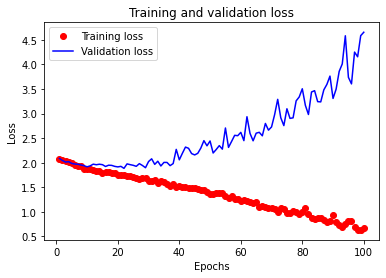

In [22]:
### loss plots using LSTM model
loss = report.history['loss']
val_loss = report.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

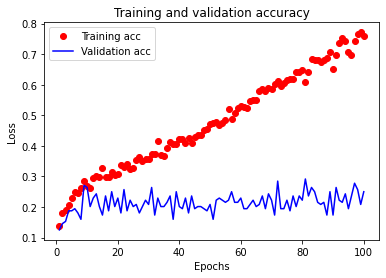

In [23]:
### accuracy plots using LSTM model
plt.clf()                                                

acc = report.history['accuracy']
val_acc = report.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [33]:

lstm.evaluate(np.expand_dims(rs_data_array[train_samples + val_samples:], -1), labels_category[train_samples + val_samples:])

5/5 [==============================] - 0s 11ms/step - loss: 3.7540 - accuracy: 0.3056


[3.7540388107299805, 0.3055555522441864]

In [34]:
emotions={1 : 'neutral', 2 : 'calm', 3 : 'happy', 4 : 'sad', 5 : 'angry', 6 : 'fearful', 7 : 'disgust', 8 : 'surprised'}
def prediction(filepath):
    test_point=extracting_MFCC(filepath)
    test_point=np.reshape(test_point,newshape=(1,40,1))
    predictions=lstm.predict(test_point)
    print(emotions[np.argmax(predictions[0])+1])

In [35]:
prediction('C:/Users/DELL/Documents/Project/Actor_02/03-01-01-01-01-01-02.wav')

1/1 [==============================] - 0s 25ms/step
sad


In [36]:
prediction('C:/Users/DELL/Documents/Project/Actor_01/03-01-08-01-01-02-01.wav')

1/1 [==============================] - 0s 31ms/step
surprised
